In [1]:

#requires libgl1 so: sudo apt-get install libgl1  
import cv2 as cv
from PIL import Image
import plotly as ply
import plotly.io as pio 
import plotly.express as px, matplotlib.pyplot as plt, numpy as np 
print( cv.__version__)
 
IMG = 'download.jpg'


4.10.0


## Read/display an image with open-cv as color image 3channels

docs in https://docs.opencv.org/3.4/index.html

<pre>
cv.imread(src, cv.ImreadModes): 
    .   The function imread loads an image from the specified file and returns it. If the image cannot be
    .   read (because of missing file, improper permissions, unsupported or invalid format), the function
    .   returns an empty matrix ( Mat::data==NULL ).

enum  	cv::ImreadModes {
  cv::IMREAD_UNCHANGED = -1,
  cv::IMREAD_GRAYSCALE = 0,
  cv::IMREAD_COLOR = 1,
  cv::IMREAD_ANYDEPTH = 2,
  cv::IMREAD_ANYCOLOR = 4,
  cv::IMREAD_LOAD_GDAL = 8,
  cv::IMREAD_REDUCED_GRAYSCALE_2 = 16,
  cv::IMREAD_REDUCED_COLOR_2 = 17,
  cv::IMREAD_REDUCED_GRAYSCALE_4 = 32,
  cv::IMREAD_REDUCED_COLOR_4 = 33,
  cv::IMREAD_REDUCED_GRAYSCALE_8 = 64,
  cv::IMREAD_REDUCED_COLOR_8 = 65,
  cv::IMREAD_IGNORE_ORIENTATION = 128
}
</pre>

### Display images 

In [132]:
cv_img = cv.imread(IMG, cv.IMREAD_COLOR)
print( cv_img[0,0:10,0:10], type(cv_img) )
print( cv_img.shape )

cv_grey_img = cv.imread(IMG, cv.IMREAD_GRAYSCALE)
print( cv_grey_img.shape )

[[169  89   0]
 [169  89   0]
 [170  90   1]
 [170  90   1]
 [171  92   1]
 [172  93   2]
 [172  94   1]
 [173  95   2]
 [175  98   2]
 [176  99   3]] <class 'numpy.ndarray'>
(148, 212, 3)
(148, 212)


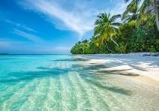

Text(0.5, 1.0, 'cv color-converted to format RGB')

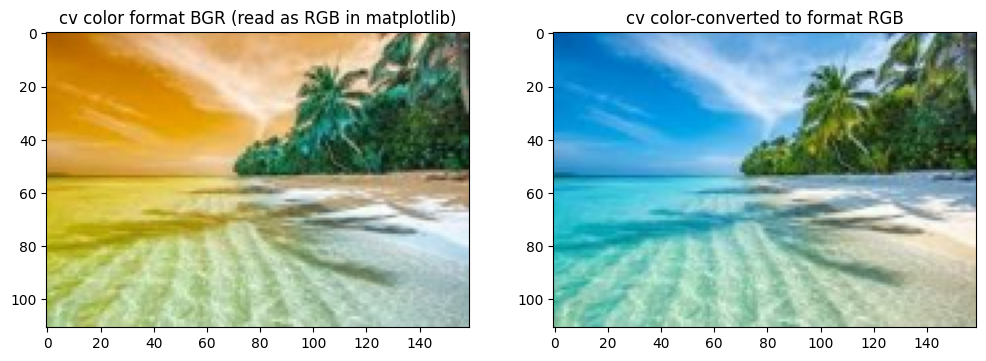

In [137]:
#using PIL 
rgb_image = cv.cvtColor(cv_img, cv.COLOR_BGR2RGB)
resized_rgb = cv.resize(rgb_image, (0, 0), fx = 0.75, fy = 0.75) #shape changed 
resized_bgr = cv.resize(cv_img, (0, 0), fx = 0.75, fy = 0.75) #shape changed 
Image.fromarray( resized_rgb , 'RGB').show( title='BGR to RGB')

#using PYPLOT 
fig, [ax1, ax2] = plt.subplots(1, 2,  figsize=(12, 4))
ax1.imshow(resized_bgr)
ax1.set_title('cv color format BGR (read as RGB in matplotlib)')
ax2.imshow(resized_rgb )
ax2.set_title('cv color-converted to format RGB')



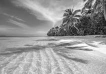

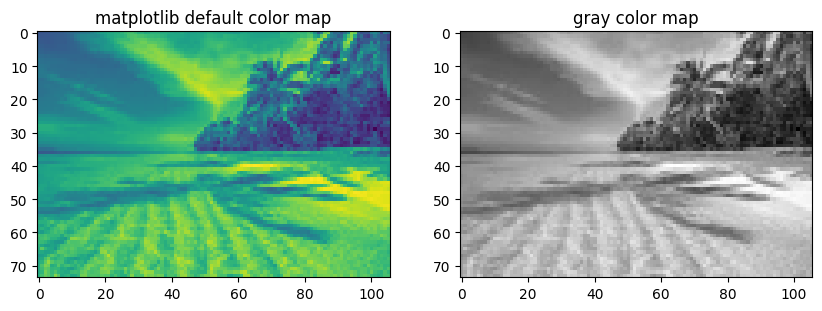

In [138]:
resized_gray = cv.resize(cv_grey_img, (0, 0), fx = 0.5, fy = 0.5) #shape changed 
Image.fromarray( resized_gray , 'L').show( title='Grayscale')

fig, [ax1,ax2] =plt.subplots( 1, 2, figsize= (10,5))
ax1.imshow(resized_gray)
ax2.imshow(resized_gray, cmap='gray')
ax1.set_title('matplotlib default color map')
ax2.set_title('gray color map')
plt.show()


#### Using IPython image to duisplay images directly in the notebooks 

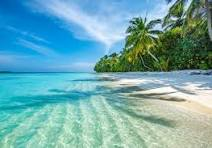

In [139]:
from IPython.display import Image as dImage 
dImage( IMG )
 

### Basic transformations 

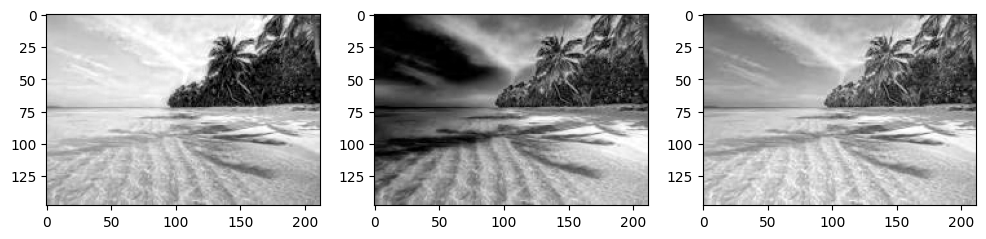

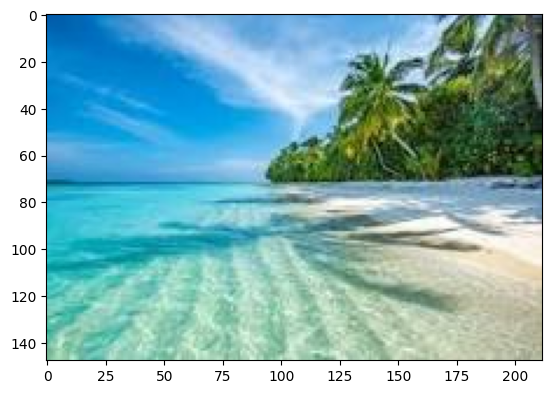

In [5]:
img = cv.imread(IMG)

Blue, Green, Red  = cv.split( img )

f, (ax1,ax2,ax3) = plt.subplots( nrows =1, ncols = 3, figsize =(12,8) )
ax1.imshow( Blue,  cmap='gray' )
ax2.imshow( Red,   cmap='gray' )
ax3.imshow( Green, cmap='gray' )
plt.show() 

merged = cv.merge( (Red, Green, Blue) )
plt.imshow( merged )
#, cv.COLOR_BGR2RGB ) 


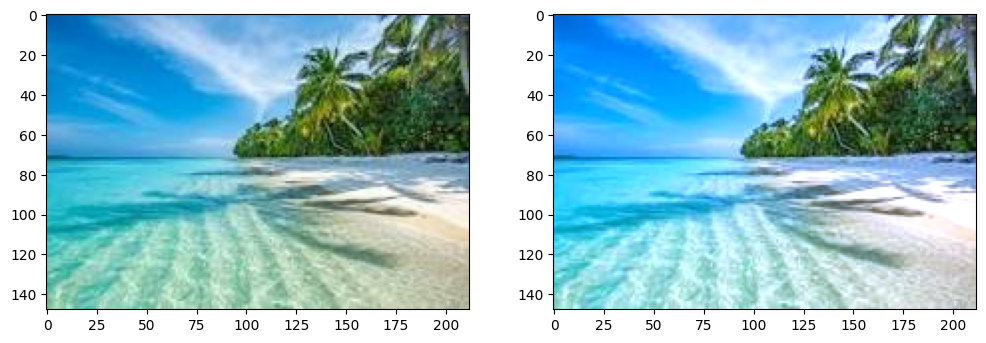

In [9]:
import numpy as np  
max_blue = 255
Blue2 =  np.clip( 1.15*Blue , 0,255).astype( 'uint8' )
original =  cv.merge( (Red, Green, Blue) ) 
enhanced =  cv.merge( (Red, Green, Blue2) ) 

brightness = np.ones( enhanced.shape ) *1.1  
enhanced = np.uint8( np.clip(cv.multiply( np.float32(enhanced), np.float32(brightness) ),0,255 )) 

f, (ax1,ax2) = plt.subplots( nrows =1, ncols = 2, figsize =(12,8) )
ax1.imshow( original  )
ax2.imshow( enhanced )


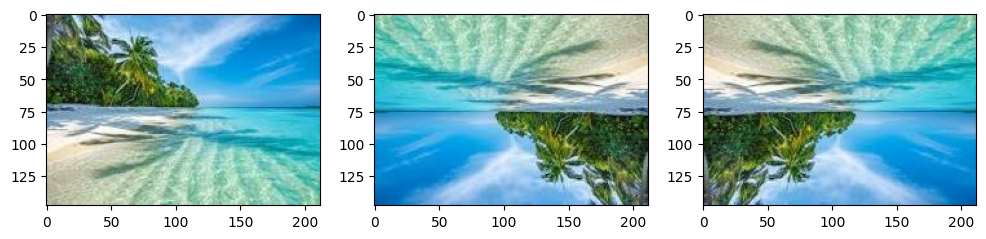

In [10]:
vflip  = cv.flip(img, 0 )[:,:,::-1]
hflip  = cv.flip(img,  1 )[:,:,::-1]
hvflip = cv.flip(img,  -1 )[:,:,::-1]


plt.figure( figsize = (12,8) )
plt.subplot( 131);plt.imshow( hflip )
plt.subplot( 132);plt.imshow( vflip )
plt.subplot( 133);plt.imshow( hvflip )

#### Thersholding 

Binary Images have a lot of use cases in Image Processing. One of the most common use cases is that of creating masks. Image Masks allow us to process on specific parts of an image keeping the other parts intact. Image Thresholding is used to create Binary Images from grayscale images. You can use different thresholds to create different binary images from the same original image.



In [64]:

def apply_thrshold( img_read, th):
    retval, img_thresh = cv.threshold(img_read, th, 255, cv.THRESH_BINARY)

    # Show the images
    plt.figure(figsize=[18, 5])
    plt.subplot(121);plt.imshow(img_read, cmap="gray");  plt.title("Original")
    plt.subplot(122);plt.imshow(img_thresh, cmap="gray");plt.title("Thresholded")
    plt.show()
    print(img_thresh.shape)
    retval, img_thresh = cv.threshold(img_read, th, 255, cv.THRESH_BINARY)
    return img_thresh



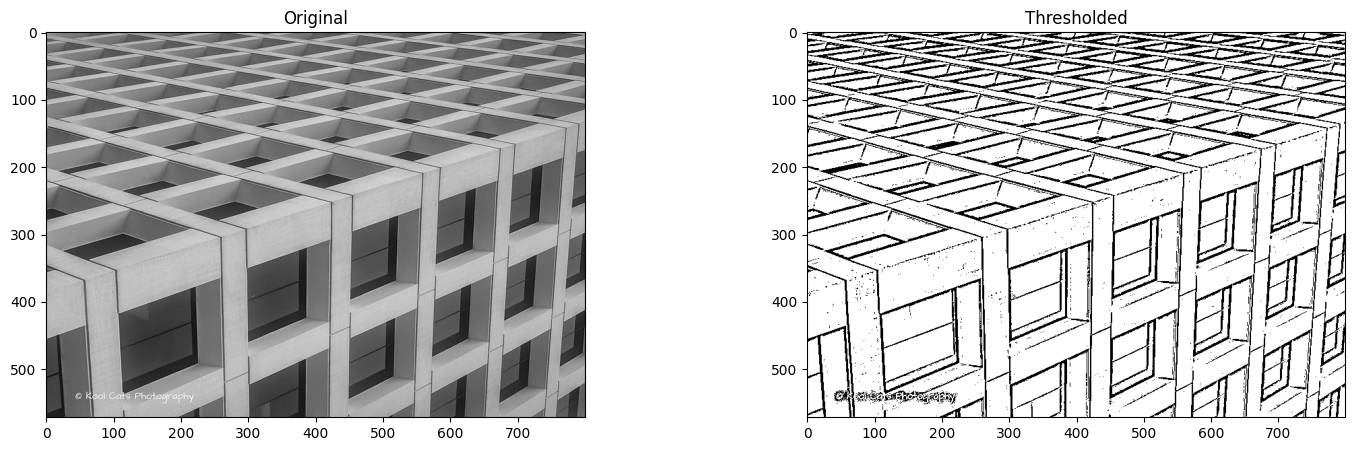

In [133]:
#i =apply_thrshold( img_read, 90)
#apply_thrshold( img_read, 50)
#apply_thrshold( img_read, 251)
img_read = cv.imread("building-windows.jpg", cv.IMREAD_GRAYSCALE)

th3 = cv.adaptiveThreshold(img_read,255,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,9,7)
plt.figure(figsize=[18, 5])
plt.subplot(121);plt.imshow(img_read, cmap="gray");  plt.title("Original")
plt.subplot(122);plt.imshow(th3, cmap="gray");plt.title("Thresholded")
plt.show()
 



done


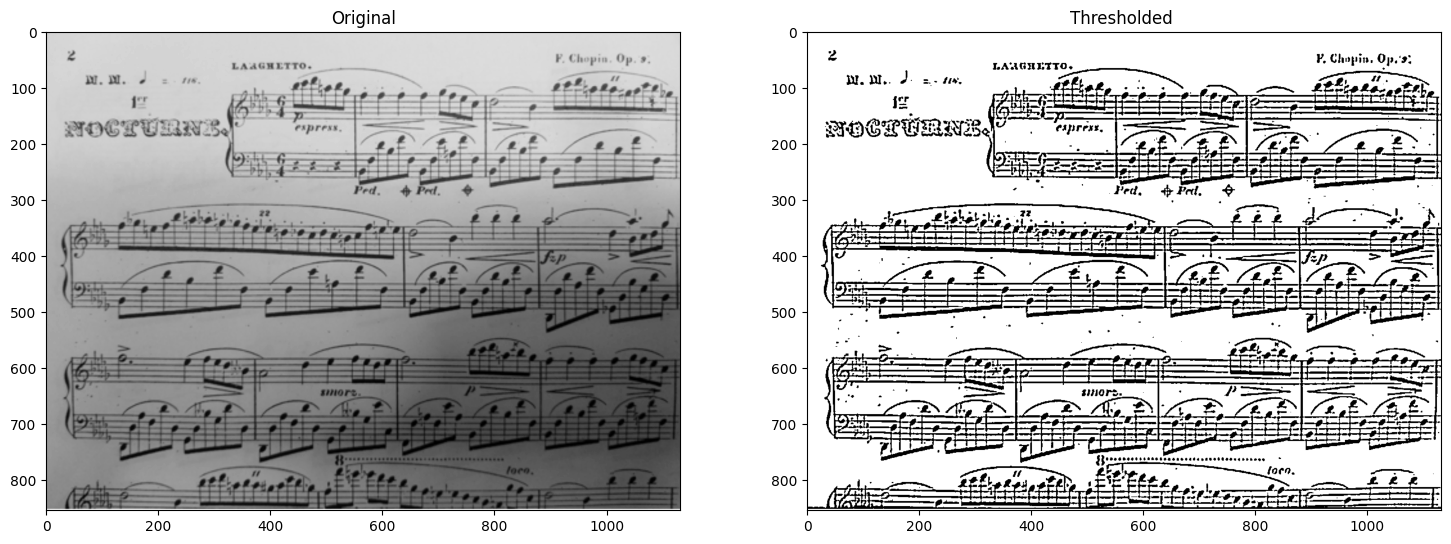

In [114]:
cv2 = cv 
img_read = cv.imread("Piano_Sheet_Music.png", cv2.IMREAD_GRAYSCALE)

# Perform adaptive thresholding
img_thresh_adp = cv2.adaptiveThreshold(img_read, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 7, 4)

# Show the images
plt.figure(figsize=[18,15])
plt.subplot(221); plt.imshow(img_read,        cmap="gray");  plt.title("Original");
plt.subplot(222); plt.imshow(img_thresh_adp,cmap="gray");  plt.title("Thresholded ");
print('done')

#### Masks 

[ WARN:0@49.121] global loadsave.cpp:241 findDecoder imread_('checkboard_color.png'): can't open/read file: check file path/integrity


TypeError: 'NoneType' object is not subscriptable

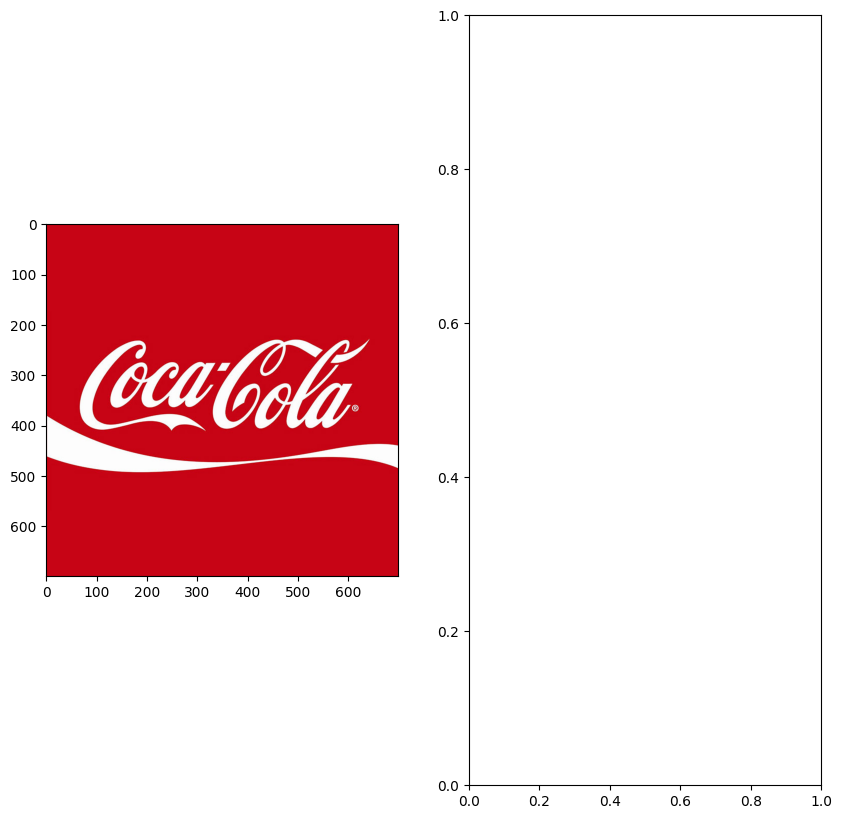

In [3]:
cola = cv.imread('coca-cola-logo.png')
colors = cv.imread('checkerboard_color.png')
fig, [ax1, ax2]= plt.subplots( nrows = 1, ncols =2, figsize=(10,10))
ax1.imshow(cola[:,:,::-1])
ax2.imshow(colors[:,:,::-1])



In [13]:
import os 
from zipfile import ZipFile
from urllib.request import urlretrieve
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)

    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)

URL = r"https://www.dropbox.com/s/0oe92zziik5mwhf/opencv_bootcamp_assets_NB4.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), "opencv_bootcamp_assets_NB4.zip")

# Download if assest ZIP does not exists.
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)        